In [34]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cv2

In [35]:
def gender_value_to_label(value):
    if value == 0:
        return "Male"
    return "Female"


def getGender(pred_sex):
    index_maxValue = pred_sex.argmax()
    if index_maxValue == 0:
        return "Male"
    return "Female"


def getRangeAge(pred_age):
    arrRangeAge = ["1-14", "15-25", "26-40", "41-60", "61-116"]
    maxIndex = list(pred_age[0]).index(max(pred_age[0]))
    rangeAge = arrRangeAge[maxIndex] + " years old"
    return rangeAge

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# Data Overview
df = pd.read_csv("/content/drive/MyDrive/EfficientNet/age_gender.csv")
print(df.shape)  
df.head()

(23705, 5)


,age,ethnicity,gender,img_name,pixels
0,1,0,0,20170110212733875.jpg.chip.jpg,252 252 254 235 228 215 203 195 193 192 191 19...
1,1,0,0,20170110212745529.jpg.chip.jpg,234 234 234 234 233 229 218 220 216 217 214 21...
2,1,0,0,20170110212758683.jpg.chip.jpg,210 206 169 161 166 172 173 176 177 190 198 20...
3,1,0,0,20170110212759695.jpg.chip.jpg,155 176 207 212 212 216 211 214 219 226 228 23...
4,1,0,0,20170110212857171.jpg.chip.jpg,96 138 173 204 223 215 211 212 207 206 204 195...


In [38]:
df = df.drop('img_name', axis=1)
df.head()

,age,ethnicity,gender,pixels
0,1,0,0,252 252 254 235 228 215 203 195 193 192 191 19...
1,1,0,0,234 234 234 234 233 229 218 220 216 217 214 21...
2,1,0,0,210 206 169 161 166 172 173 176 177 190 198 20...
3,1,0,0,155 176 207 212 212 216 211 214 219 226 228 23...
4,1,0,0,96 138 173 204 223 215 211 212 207 206 204 195...


In [39]:
df.isnull().sum()

age          0
ethnicity    0
gender       0
pixels       0
dtype: int64

In [40]:
columns = ["age","gender","ethnicity"]
y = df.drop("pixels", axis = 1)
x = df.drop(columns, axis = 1)

In [41]:
x.head()

,pixels
0,252 252 254 235 228 215 203 195 193 192 191 19...
1,234 234 234 234 233 229 218 220 216 217 214 21...
2,210 206 169 161 166 172 173 176 177 190 198 20...
3,155 176 207 212 212 216 211 214 219 226 228 23...
4,96 138 173 204 223 215 211 212 207 206 204 195...


In [42]:
y.head()

,age,ethnicity,gender
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [43]:
y.nunique()

age          104
ethnicity      5
gender         2
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



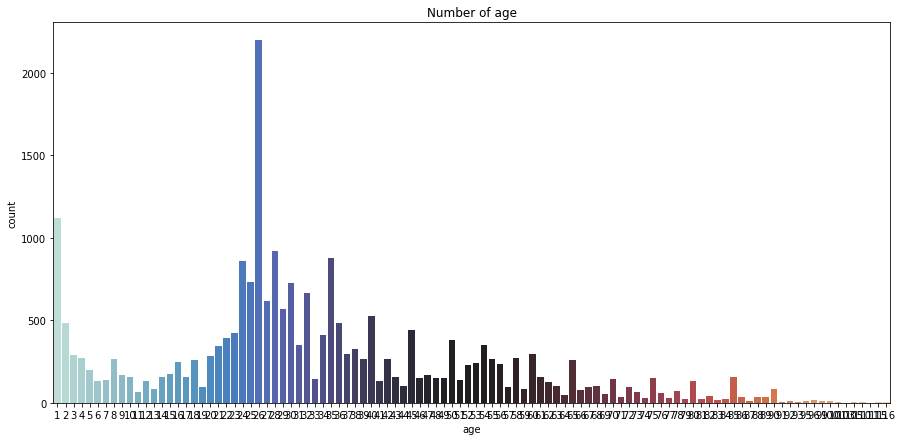

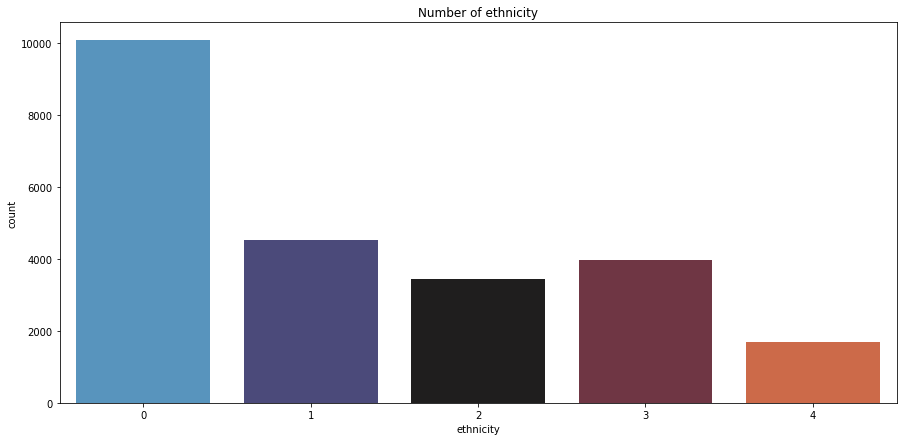

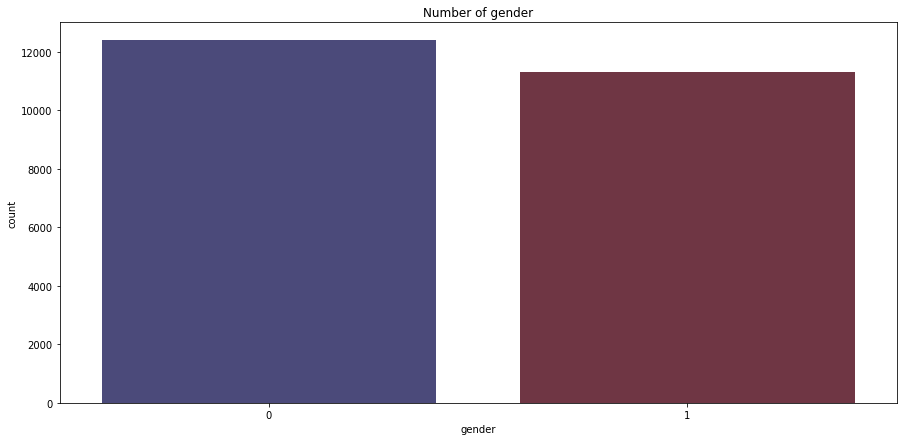

In [44]:
# Data Distribution
for i in y.columns :
    plt.figure(figsize=(15,7))
    g = sns.countplot(y[i], palette="icefire")
    plt.title("Number of {}".format(i))

In [45]:
# Image Shape
num_pixels = len(x['pixels'][0].split(" "))
img_height = int(np.sqrt(len(x['pixels'][0].split(" "))))
img_width = int(np.sqrt(len(x['pixels'][0].split(" "))))
print(num_pixels, img_height, img_width)

2304 48 48


In [46]:
# Reshape Data
x = pd.Series(x['pixels'])
x = x.apply(lambda x: np.reshape(np.array(x.split(' '), dtype='float32'), (48, 48)))
print(x[0])


[[252. 252. 254. ... 134. 133. 129.]
 [252. 252. 252. ... 134. 133. 129.]
 [249. 249. 251. ... 135. 132. 128.]
 ...
 [226. 225. 224. ... 144. 140. 149.]
 [228. 228. 225. ... 154. 160. 166.]
 [228. 228. 226. ... 169. 170. 173.]]


In [47]:
arr3d = np.zeros((48, 48, 3))
X = np.zeros(shape=(x.shape[0], 48, 48, 3))
for i in range(x.shape[0]):
    arr3d[:, :, 0] = arr3d[:, :, 1] = arr3d[:, :, 2] = x[i]
    X[i] = arr3d

print(X.shape)

(23705, 48, 48, 3)


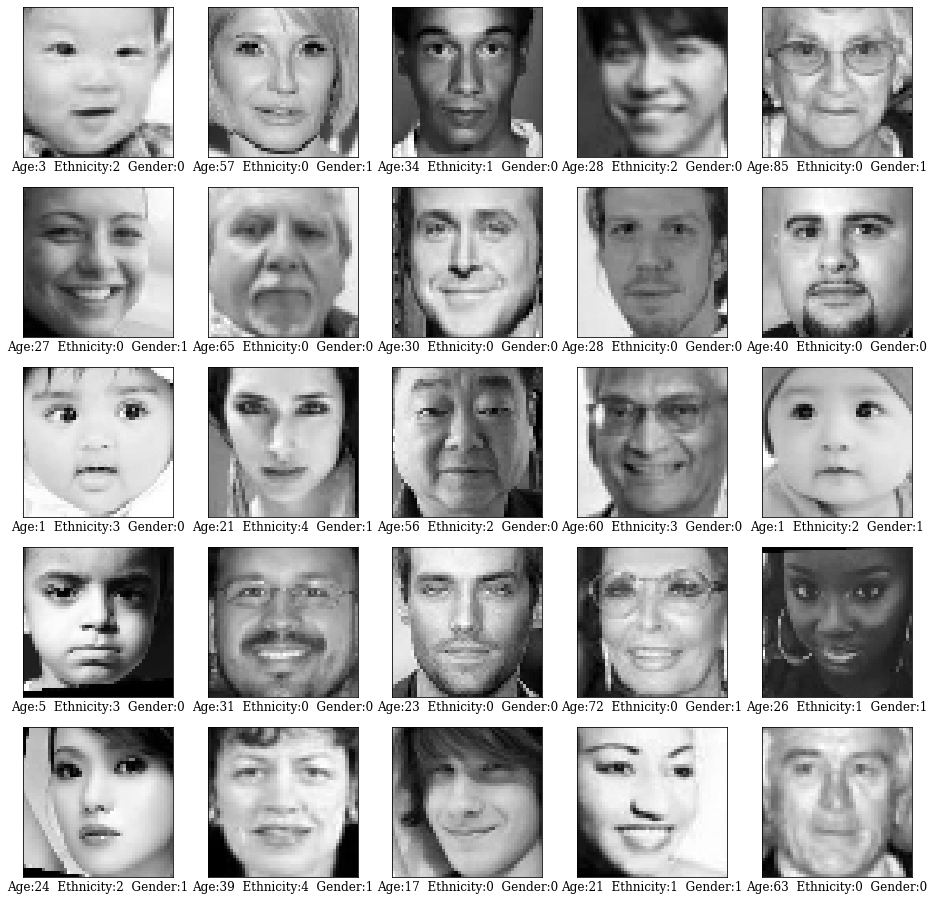

In [48]:
# Images Overview
def plot_data(rows, cols, lower_value, upper_value):
    fig = plt.figure(figsize=(16, 16))
    font = {'family': 'serif',
            'color':  'black',
            'weight': 'normal',
            'size': 12,
            }

    for i in range(0, cols * rows):
        k = np.random.randint(lower_value, upper_value)

        plt.subplot(rows, cols, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[k], cmap='gray')
        plt.xlabel(
            "Age:"+str(y['age'].iloc[k]) +
            "  Ethnicity:"+str(y['ethnicity'].iloc[k]) +
            "  Gender:" + str(y['gender'].iloc[k]), fontdict=font)

    plt.show()


plot_data(rows=5, cols=5, lower_value=0, upper_value=len(df))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Number of age')

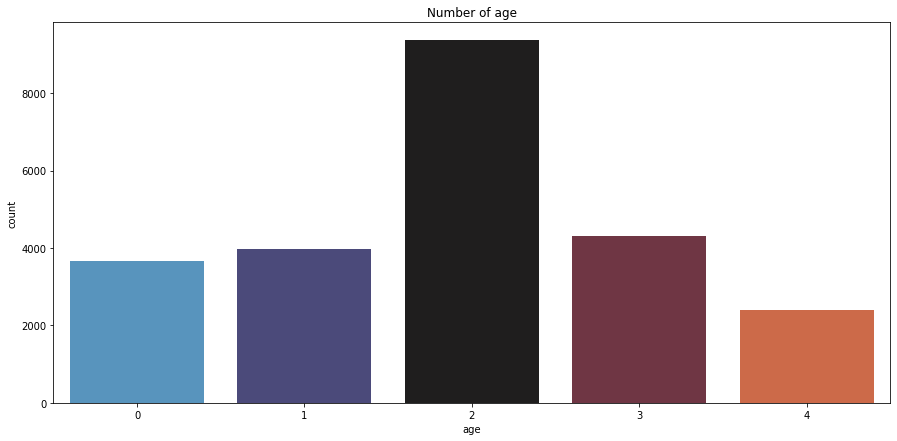

In [49]:
y["age"] = pd.cut(y["age"],bins=[0,14,25,40,60,116],labels=["0","1","2","3","4"])
plt.figure(figsize=(15,7))
g = sns.countplot(y["age"], palette="icefire")
plt.title("Number of age")

In [50]:
import numpy as np
from keras.utils import to_categorical # convert to one-hot-encoding
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import optimizers
from keras.utils.generic_utils import get_custom_objects
from keras.layers import GlobalMaxPool2D, Dropout, Dense, Activation, BatchNormalization
from keras.models import Model
from keras.backend import sigmoid
# Options: EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5,...
# Higher the number, the more complex the model is
# Now in this project, I use model EfficientNetB2
from keras.applications.efficientnet import EfficientNetB2 as Net
import tensorflow as tf

In [51]:
# Categorizing Target Values
age_matrix = np.array(y["age"])
gender_matrix = np.array(y["gender"])
age = to_categorical(age_matrix, num_classes = 5)
gender = to_categorical(gender_matrix, num_classes = 2)
print(age)
print("-"*15)
print(gender)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
---------------
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [52]:
labels = []
i = 0
while i < df.shape[0]:
    label = []
    label.append(age[i])
    label.append(gender[i])
    
    # Both age and gender are combined and stored in labels
    labels.append(label)
    i += 1

# convert the list into array.
labels = np.array(labels)
print(labels.shape)

(23705, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [53]:
# Splitting the data taking data set
X_train, X_test, Y_train, Y_test= train_test_split(X,labels,test_size=0.25, random_state=0)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(17778, 48, 48, 3)
(17778, 2)
(5927, 48, 48, 3)
(5927, 2)


In [54]:
trainAgeY = np.zeros((Y_train.shape[0], 5))
trainGenderY = np.zeros((Y_train.shape[0], 2))
testAgeY = np.zeros((Y_test.shape[0], 5))
testGenderY = np.zeros((Y_test.shape[0], 2))

for i in range(Y_train.shape[0]):
    trainAgeY[i] = Y_train[:,0][i]
    trainGenderY[i] = Y_train[:,1][i]

for i in range(Y_test.shape[0]):
    testAgeY[i] = Y_test[:,0][i]
    testGenderY[i] = Y_test[:,1][i]

In [55]:
IMAGE_SIZE = 48
BATCH_SIZE = 256
NUM_AGE_CLASSES = 5
NUM_GENDER_CLASSES = 2
DROPOUT_RATE = 0.2
input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)
NUM_EPOCHS = 35
DECAY_LR_RATE = 0.9

In [56]:
class SwishActivation(Activation):
    def __init__(self, activation, **kwargs):
        super(SwishActivation, self).__init__(activation, **kwargs)
        self.__name__ = 'swish_act'


def swish_act(x, beta=1):
    return x * sigmoid(beta * x)


class Efficient_Net(object):
    def __init__(self):
        self.model = self.build_model()

        # Compile the model
        losses = {
            "age_output": "categorical_crossentropy",
            "gender_output": "categorical_crossentropy"
        }

        opt = optimizers.Adam(1e-3)
        self.model.compile(loss=losses, optimizer=opt, metrics=['acc'])


    @staticmethod
    def build_age_branch(x):
        # Output age branch
        predictions_age = Dense(NUM_AGE_CLASSES, activation="softmax", name='age_output')(x)

        return predictions_age

    @staticmethod
    def build_gender_branch(x):
        # Output gender branch
        predictions_gender = Dense(NUM_GENDER_CLASSES, activation="softmax", name='gender_output')(x)

        return predictions_gender

    def build_model(self):
        get_custom_objects().update({'swish_act': SwishActivation(swish_act)})

        # Model
        model = Net(weights='imagenet', include_top=False, input_shape=input_shape)

        # Adding 2 fully-connected layers to B2.
        x = model.output

        x = BatchNormalization()(x)
        x = GlobalMaxPool2D(name='gap1')(x)
        x = Dropout(DROPOUT_RATE, name='dropout1')(x)

        # Output layer
        predictions_age = self.build_age_branch(x)
        predictions_gender = self.build_gender_branch(x)
        model_final = Model(inputs=model.input, outputs=[predictions_age, predictions_gender])

        return model_final

    def train(self):
        # reduce learning rate
        reduce_lr = ReduceLROnPlateau(monitor='val_age_output_acc', factor=DECAY_LR_RATE, patience=5, verbose=1, )
        # Model Checkpoint
        cpt_save = ModelCheckpoint('/content/drive/MyDrive/EfficientNet/efficientNetB2_weight.h5', save_best_only=True, monitor='val_age_output_acc', mode='max')

        print("Training......")

        return self.model.fit(X_train, {"age_output": trainAgeY, "gender_output": trainGenderY}, validation_split=0.15,
                       callbacks=[cpt_save, reduce_lr], verbose=1, epochs=NUM_EPOCHS, shuffle=True,
                       batch_size=BATCH_SIZE)

In [57]:
model = Efficient_Net().model.summary()

31790344/31790344 [==============================] - 3s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 rescaling_2 (Rescaling)        (None, 48, 48, 3)    0           ['input_3[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 48, 48, 3)   7           ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                                  
 tf.math.truediv_2 (TFOpLam

In [58]:
history = Efficient_Net().train()

Training......
Epoch 1/35
60/60 [==============================] - 40s 352ms/step - loss: 2.4308 - age_output_loss: 1.7308 - gender_output_loss: 0.7000 - age_output_acc: 0.4361 - gender_output_acc: 0.7343 - val_loss: 3.6869 - val_age_output_loss: 1.9492 - val_gender_output_loss: 1.7377 - val_age_output_acc: 0.4166 - val_gender_output_acc: 0.5857 - lr: 0.0010
Epoch 2/35
60/60 [==============================] - 13s 209ms/step - loss: 1.4988 - age_output_loss: 1.1203 - gender_output_loss: 0.3785 - age_output_acc: 0.5785 - gender_output_acc: 0.8364 - val_loss: 2.4399 - val_age_output_loss: 1.6884 - val_gender_output_loss: 0.7515 - val_age_output_acc: 0.5216 - val_gender_output_acc: 0.7957 - lr: 0.0010
Epoch 3/35
60/60 [==============================] - 12s 209ms/step - loss: 1.3483 - age_output_loss: 1.0087 - gender_output_loss: 0.3396 - age_output_acc: 0.6005 - gender_output_acc: 0.8528 - val_loss: 1.7080 - val_age_output_loss: 1.1993 - val_gender_output_loss: 0.5087 - val_age_output_acc:

In [59]:
fig = px.line(
    history.history, y=['age_output_loss', 'val_age_output_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='History of Training Age (EfficientNetB2)')
fig.show()

In [60]:
fig = px.line(
    history.history, y=['age_output_acc', 'val_age_output_acc'],
    labels={'index': 'epoch', 'value': 'accuracy'}, 
    title='History of Training Age (EfficientNetB2)')
fig.show()

In [61]:
fig = px.line(
    history.history, y=['gender_output_loss', 'val_gender_output_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='History of Training Gender (EfficientNetB2)')
fig.show()

In [62]:
fig = px.line(
    history.history, y=['gender_output_acc', 'val_gender_output_acc'],
    labels={'index': 'epoch', 'value': 'accuracy'}, 
    title='History of Training Gender (EfficientNetB2)')
fig.show()

In [63]:
model = tf.keras.models.load_model('/content/drive/MyDrive/EfficientNet/efficientNetB2_weight.h5')

loss, age_output_loss, gender_output_loss, age_output_acc, gender_output_acc = model.evaluate(x=X_test, y={'age_output': testAgeY, 'gender_output': testGenderY}, verbose=0)
print('Loss of Testing Age: {}'.format(age_output_loss))
print('Loss of Testing Gender: {}'.format(gender_output_loss))
print('Accuracy of Testing Age: {}'.format(age_output_acc))
print('Accuracy of Testing Gender: {}'.format(gender_output_acc))

Loss of Testing Age: 0.8346968293190002
Loss of Testing Gender: 0.2745153307914734
Accuracy of Testing Age: 0.670997142791748
Accuracy of Testing Gender: 0.8942129015922546


In [66]:
fig = px.bar(
    x=["Age", "Gender"],
    y=[age_output_acc, gender_output_acc],
    labels={'x': "", 'y': "Accuracy"},
    color=["Age", "Gender"],
    title="Model Performance"
)

fig.show()

1/1 [==============================] - 2s 2s/step
[[9.9676764e-01 1.0319402e-03 9.3380682e-04 1.2792865e-04 1.1386786e-03]]
Predicted Age: 1-14 years old
Predicted Sex: Male
Actual Age: 1
Actual Sex: Female


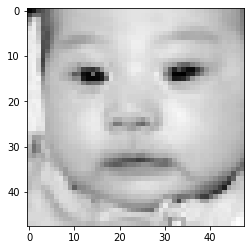

In [65]:
def test_image(ind,model):
  plt.imshow(x[ind], cmap='gray')

  arr3d = np.zeros((48, 48, 3))
  arr3d[:, :, 0] = arr3d[:, :, 1] = arr3d[:, :, 2] = x[ind]
  pixels = arr3d

  pred=model.predict(np.array([pixels]))
  print(pred[0])
  ac_age=df['age'][ind]
  ac_sex=df['gender'][ind]
  print("Predicted Age: "+ getRangeAge(pred[0]))
  print("Predicted Sex: "+ getGender(pred[1]))
  print("Actual Age: "+ str(ac_age))
  print("Actual Sex: "+ gender_value_to_label(ac_sex))

test_image(666,model)